<a href="https://colab.research.google.com/github/Smarikatripathi/Data-Science/blob/main/DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 1 : Data Preprocessing: Cleaning and integrating datasets from multiple sources.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#Load a CSV file.
df = pd.read_csv("/content/train.csv")

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking missing values.

In [40]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handling Missing Data

Filling Age with median

In [41]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


Filling Embarked with mode

In [42]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


Droping the original Cabin column

In [43]:
df.drop('Cabin', axis=1, inplace=True)

Checking Missing Data

In [44]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Check if there are any duplicate rows

In [45]:
df.duplicated().sum()


np.int64(0)

lab-2 : Plotting and inferring empircial distribution

Distribution of single numeric variables (empirical distribution)

Create helpful features (FamilySize, Title, ensure HasCabin)

In [62]:
# 1) Feature Engineering (safe for missing columns)
if 'FamilySize' not in df.columns:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# HasCabin feature
if 'Cabin' in df.columns:
    df['HasCabin'] = df['Cabin'].notnull().astype(int)
else:
    df['HasCabin'] = 0

# Extract Title from name
if 'Title' not in df.columns:
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
    df['Title'] = df['Title'].replace(rare_titles, 'Rare')



Univariate: Age distribution (hist + KDE)

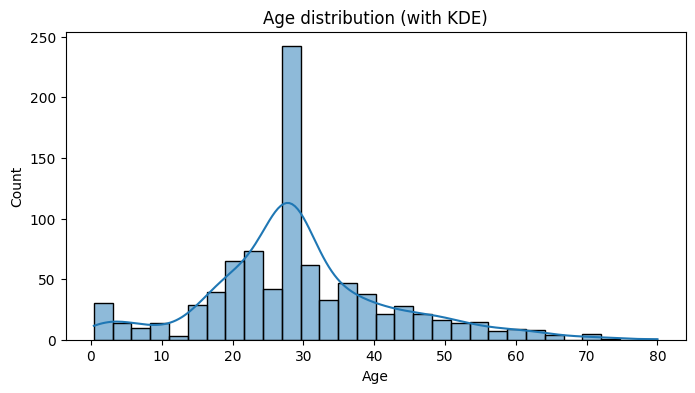

In [51]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age distribution (with KDE)')
plt.xlabel('Age')
plt.show()

Univariate: Fare distribution (raw and log) — handle zeros safely

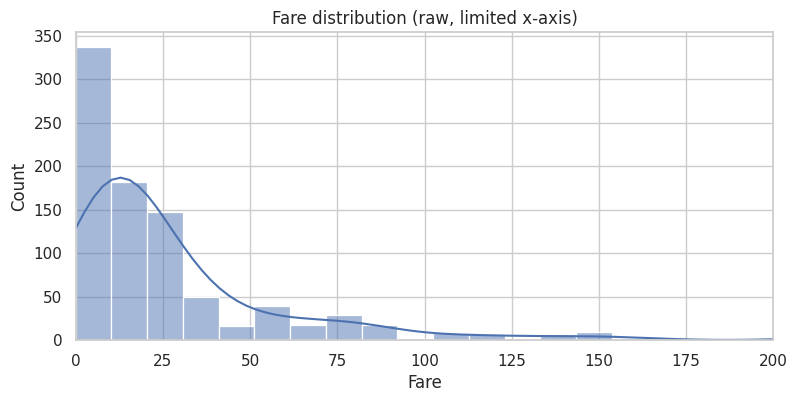

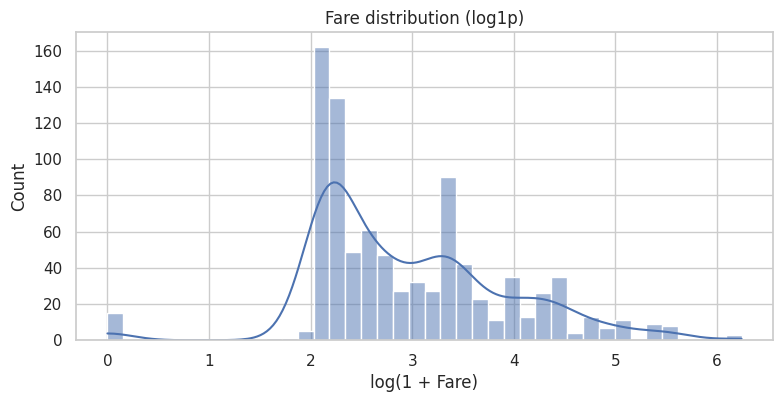

In [64]:
#Fare distribution (raw)
plt.figure(figsize=(9,4))
sns.histplot(df['Fare'].dropna(), bins=50, kde=True)
plt.xlim(0, 200)   # focus on main mass; remove this if you want full tail
plt.title('Fare distribution (raw, limited x-axis)')
plt.xlabel('Fare')
plt.show()

#Fare distribution (log-transformed)
plt.figure(figsize=(9,4))
sns.histplot(np.log1p(df['Fare'].fillna(0)), bins=40, kde=True)
plt.title('Fare distribution (log1p)')
plt.xlabel('log(1 + Fare)')
plt.show()


FamilySize distribution (countplot)

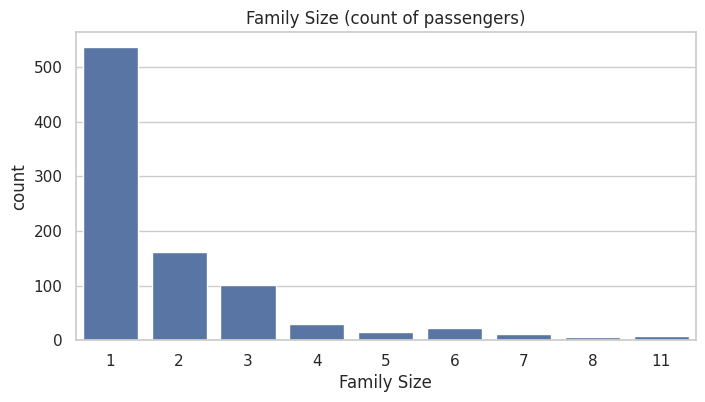

In [65]:
# FamilySize counts
plt.figure(figsize=(8,4))
sns.countplot(x='FamilySize', data=df, order=sorted(df['FamilySize'].unique()))
plt.title('Family Size (count of passengers)')
plt.xlabel('Family Size')
plt.show()


Overall survival counts

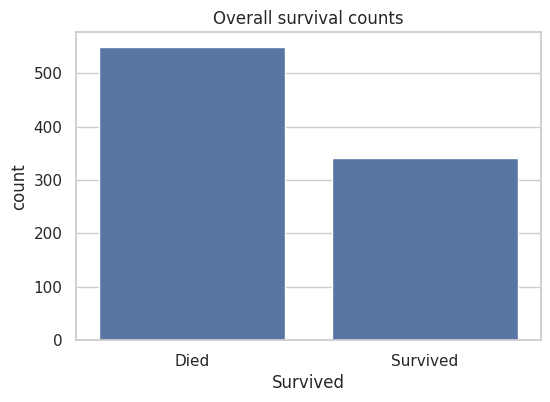

Survival proportion:
 Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [66]:
#Overall survival
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.xticks([0,1], ['Died','Survived'])
plt.title('Overall survival counts')
plt.show()

# survival proportion
print("Survival proportion:\n", df['Survived'].value_counts(normalize=True))


Survival by Sex and Pclass (categorical comparisons)

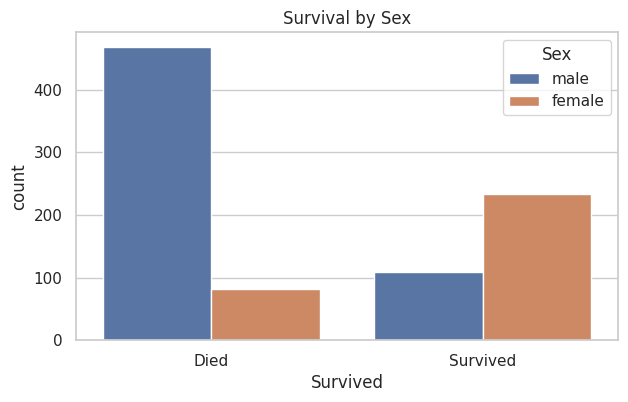

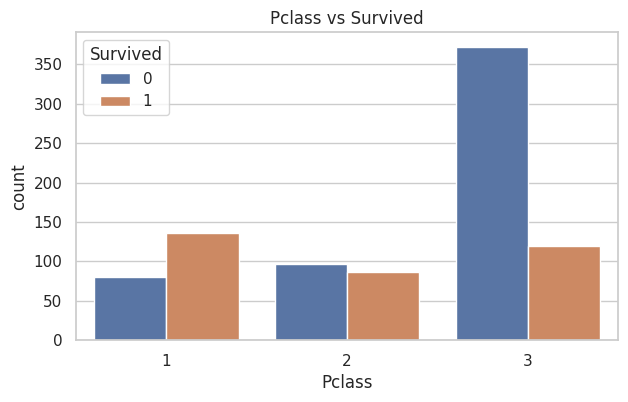

In [71]:
#Survival by Sex
plt.figure(figsize=(7,4))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.xticks([0,1], ['Died','Survived'])
plt.title('Survival by Sex')
plt.show()

#Survival by Pclass
plt.figure(figsize=(7,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Pclass vs Survived')
plt.show()
